# Project: Investigating No-Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This dataset contains roughly 100,000 medical appointments collected in Brazil to address the question of whether or not patients show up for their appointment. 

The Main variable we are interested in is:

- **No-show**: here 'no' means the patient showed up for the scheduled appointment and 'yes' means the patient didn't show up

A number of Patient characteristics were gathered such as

- Gender
- Age
- Hypertension
- Diabetes
- Alcoholism
- Handicap


### Asking Questions: 
#### What patient characteristics are most important in predicting whether a patient will show up for their scheduled appointment?



In [3]:
# importing packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Magic words
%matplotlib inline

# Chart Styling (used print(plt.style.available from the documentation)
plt.style.use('Solarize_Light2')


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
#Loading data
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**we can see there are 14 columns and 110527 rows**\
**we can see columns names are not in lowercase**\
**there is hyphen in the No-show column**\
**there is a typo in hypertension and hadicap columns**

### Assessing

In [6]:
print('there is no missing data') if not df.isnull().sum().any() else print('there is missing data')

there is no missing data


In [7]:
 print('there are no duplicates') if not df.duplicated().any() else print('there are duplicates')

there are no duplicates


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**we can see The minimum age is -1**\
**let's take a look at rows with age < 0**

In [9]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


**Only one row.**

### Data Cleaning

checklist
- [ ] delete one row with age < 0
- [ ] delete uneeded columns,
- [ ] correct typos, replace hyphen with underscore
- [ ] change to lowercase

In [10]:
df.drop(df.index[99832], inplace = True)

In [11]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### **Let's drop the columns  we don't need**

In [12]:
df.drop(labels=['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood'],axis=1,inplace=True)

**Let's correct some typos in the column names, replace hyphen with underscore and change to lowercase in order to be able to use query on them and call them directly later on**

In [13]:
df.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap','No-show':'No_show'}, inplace = True)
df.columns = df.columns.str.lower()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
gender          110526 non-null object
age             110526 non-null int64
scholarship     110526 non-null int64
hypertension    110526 non-null int64
diabetes        110526 non-null int64
alcoholism      110526 non-null int64
handicap        110526 non-null int64
sms_received    110526 non-null int64
no_show         110526 non-null object
dtypes: int64(7), object(2)
memory usage: 8.4+ MB


checklist
- [x] delete one row with age < 0
- [x] delete uneeded columns,
- [x] correct typos, replace hyphen with underscore
- [x] change to lowercase

**the dataframe looks pretty clean now let's begin our analysis**

<a id='eda'></a>
## Exploratory Data Analysis




**First let's define functions to reduce repetitive code**

In [15]:
def research_plot(df,first_var,second_var,kind,labels,title,colors):
    if kind == 'bar':
        if second_var=='':
            df.groupby(first_var).size().plot(kind='bar', color=colors, figsize=(6,6));
        else:
            df.groupby([first_var, second_var]).size().plot(kind=kind, color=colors, figsize=(6,6));
            print(df.groupby([first_var, second_var]).size())
    elif kind=='pie':
        if second_var =='':
            df.groupby(first_var).size().plot(kind='pie',labels=labels, figsize=(6,6))
        else:
            df.groupby([first_var, second_var]).size().plot(kind=kind,figsize=(6,6), labels=labels);
            print(df.groupby([first_var, second_var]).size())
    plt.title(title)

   

### Research Question 1 (Do patients who received sms more likely to show up for their scheduled appointment!)

no_show  sms_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
dtype: int64


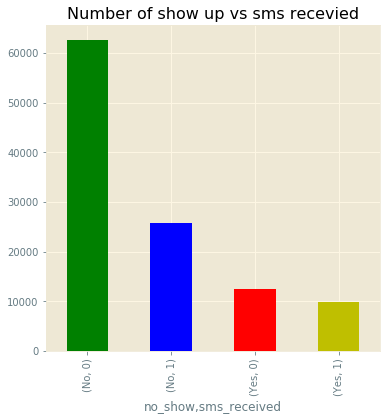

In [16]:
colors= ['g','b','r','y']
labels=['received sms and showed up','didn\'t receive sms and showed up','didn\'t receive sms and didn\'t show up','received sms and didn\'t show up']
title='Number of show up vs sms recevied'
research_plot(df,"no_show","sms_received",'bar',labels,title,colors)

As we can see number of patients who show up is more in patients who didn't receive sms

### Research Question 2  (Are patients with scholarship more likely to show up for their appointment?)

scholarship
0    99665
1    10861
dtype: int64


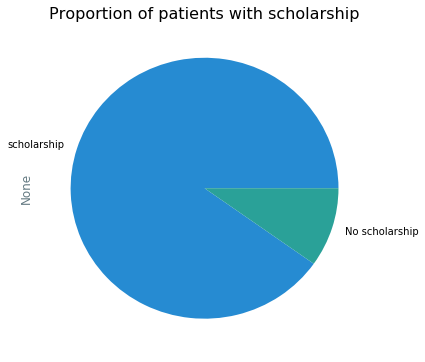

In [17]:
labels = ['scholarship','No scholarship']
research_plot(df,'scholarship','','pie',labels,'Proportion of patients with scholarship','')

number_scholar = df.groupby('scholarship').size()[1]
percent_scholar = ((number_scholar/len(df))*100).round(2)
print(df.groupby('scholarship').size())

In [18]:
print('There are {}% of patients with scholarship\nlet\'s zoom in this group'.format(percent_scholar))

There are 9.83% of patients with scholarship
let's zoom in this group


scholarship  no_show
1            No         8283
             Yes        2578
dtype: int64


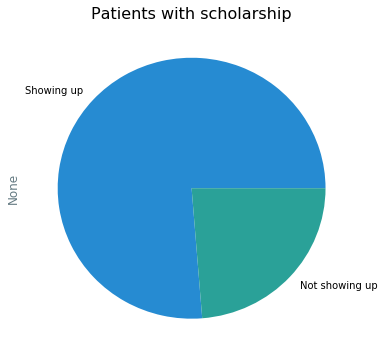

In [19]:
labels = ['Showing up','Not showing up']
title = 'Patients with scholarship'
colors = ['g','b']
research_plot(df.query('scholarship == 1'),'scholarship','no_show','pie',labels,title,'')


In [20]:
df_scholarship = df.groupby(['scholarship','no_show'])
percent_show = ((df_scholarship.size()[1][0])/number_scholar*100).round(2)

print('{}% of patients with scholarship showed up for their appointment'.format(percent_show))

76.26% of patients with scholarship showed up for their appointment


scholarship  no_show
0            No         79924
             Yes        19741
dtype: int64


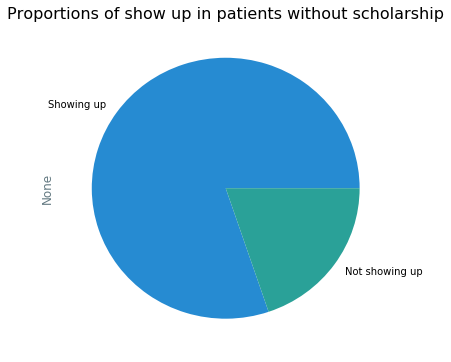

In [21]:
df_without_scholar = df.query('scholarship == 0').groupby(['scholarship','no_show'])
df_without_scholar_percent = (df_without_scholar.size()[0][0] / (df_without_scholar.size()[0][1] +df_without_scholar.size()[0][0]))*100
df_without_scholar_percent =df_without_scholar_percent.round(2)

labels=['Showing up','Not showing up']
research_plot(df.query('scholarship == 0'),'scholarship','no_show','pie',labels,'Proportions of show up in patients without scholarship','')

plt.title('Proportions of show up in patients without scholarship');


In [22]:
print('{}% of patients without scholarship showed up for their appointment'.format(df_without_scholar_percent))

80.19% of patients without scholarship showed up for their appointment


### Research Question 3  (Do alcoholic patients more likely to not show up?)

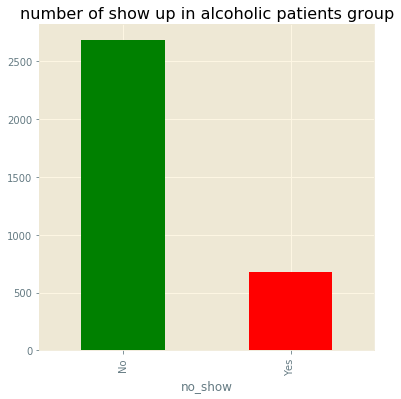

In [23]:
research_plot(df.query('alcoholism==1'),'no_show','','bar','','number of show up in alcoholic patients group',['g','r']);

As we can see number of patients showing up for their appointments is clearly greater than no-show ups in alcoholic patients

### Research Question 4  (what is the mean age of patients who didn't show up in their appointment? )

**Let's explore the distribution of age in the no_show group**

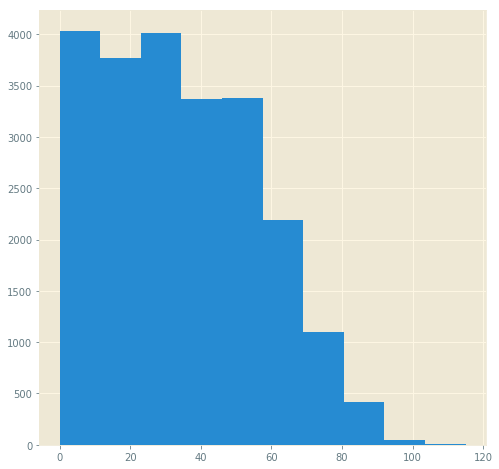

In [24]:
df_no_show_age = df.query('no_show=="Yes"').age
df_no_show_age.hist(figsize=(8,8));

**The age is right skewed**

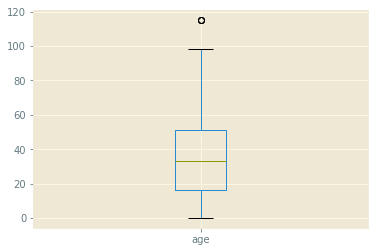

In [29]:
df_no_show_age.plot(kind='box');

**we can spot an outlier here**

In [26]:
df_no_show_age.describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: age, dtype: float64

**The mean age of no show is 34**

In [27]:
df.age.mean()

37.089218826339504

**the mean age of the whole group is 37**

<a id='conclusions'></a>
## Conclusions


### Research Question 1 (Do patients who received sms more likely to show up for their scheduled appointment!)
As we saw earlier , in contrast to what is expected.. The number of show ups is more in patients who didn't receive sms so it seems receiving sms doesn't predict show up

### Research Question 2  (Are patients with scholarship more likely to show up for their appointment?)
As we saw earlier 76.26% patients with scholarship showed up and 80.19% of patients without scholarship showed up so it seems patients with scholarship aren't more likely to show up for their appointment.

### Research Question 3  (Do alcoholic patients more likely to not show up?)

As we saw earlier Alcoholism doesn't seem to be a factor  for predicting show ups

### Research Question 4  (what is the mean age of patients who didn't show up in their appointment? )

the mean age of no show is 34. That is lower than the mean age of the whole group which is 37

## Limitations:

There are other factors we have not analysed here such as the neighbourhood, gender, handicap and the distribution of chronic diseases (hypertenstion and diabetes) in the no show group.. we can further classify the ages into groups and correlate them with the no-show variable. 

In the future we suggest gathering more data concerning the nearness hospital to the patient and then analyze the distance and correlate it with the no-show variable.

We can also further analyse the difference between appointment day and scheduled day and whether it predicts the no-show.

The results we found in explanatory analysis are not suggesting causality.. we can further research their statistical significance and see if we need a bigger sample size.

outliers: 
we spotted an outlier in the age group we can simply ignore it

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])


0